<h1 align="center"> Tsouros Iakovos Marios </h1>
<h1 align="center"> Computational Solid State Physics </h1>
<h1 align="center"> Problem 3 </h1>

## Assignment

Create a two-dimensional grid of size NxN. N should take different values and will usually be in the range
100 <N <1000. The grid sites will be randomly chosen to be 0 or 1 with probability p being 1 and (1-p)
being 0. Then apply the CMLT algorithm to find the full distribution of clusters. Change p from 0.1 to 0.8
initially with Δp = 0.1, but close to the critical point $p_c$ with Δp = 0.01. Find the values of the critical point
$p_c$.
Calculate the quantity:

\begin{equation} I_{av} = \sum^{m_max}_{m=1} \frac{i_m m^2}{pN^2} \end{equation}

Now calculate the $I^{'}_{av}$ that is the same as the $I_{av}$ , but without the largest cluster. Make the graphs of $I_{av}$ and $I^{’}_{av}$ vs $p$.
All results must be averages, so they need 1000 runs.

pmax:

\begin{equation} p_{max} = \frac{m_{max}}{pN^2} \end{equation}

## Solution

The program that implements the solution was implemented in `C++` and can be found in the attached files and [on github](https://gist.github.com/iakovts/457bbc1f15305cfdb9677d63826b0d61).

The script was executed 1000 times for each `p` on a `500x500` grid, and the results are stored in a file `percolation_res.txt`.

The location of $p_c$ was determined from the maximum of $I^{'}_{av}$.

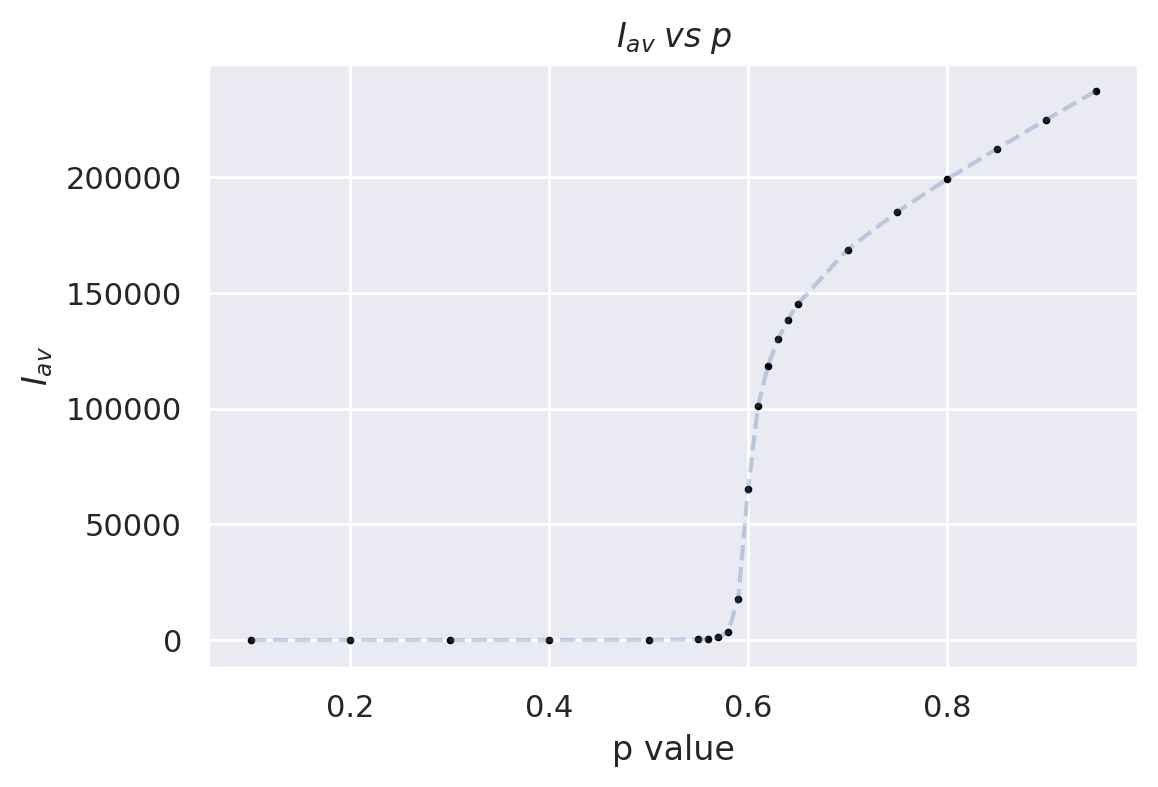

In [31]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_theme()

file = np.loadtxt("percolation_res.txt", delimiter=",", dtype=np.double)

p_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.56, 0.57,
          0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64,
          0.65, 0.7,  0.75, 0.8, 0.85, 0.9,  0.95]

p_c = p_vals[np.argmax(file[:, 1])]

# Plot for I
fig, ax = plt.subplots(dpi=200)
ax.scatter(p_vals, file[:,0], s=3, color="black")
ax.plot(p_vals, file[:,0], "--", alpha=.3)
ax.set_title("$I_{av} \; vs \; p$")
ax.set_xlabel("p value")
ax.set_ylabel("$I_{av}$")
plt.show()




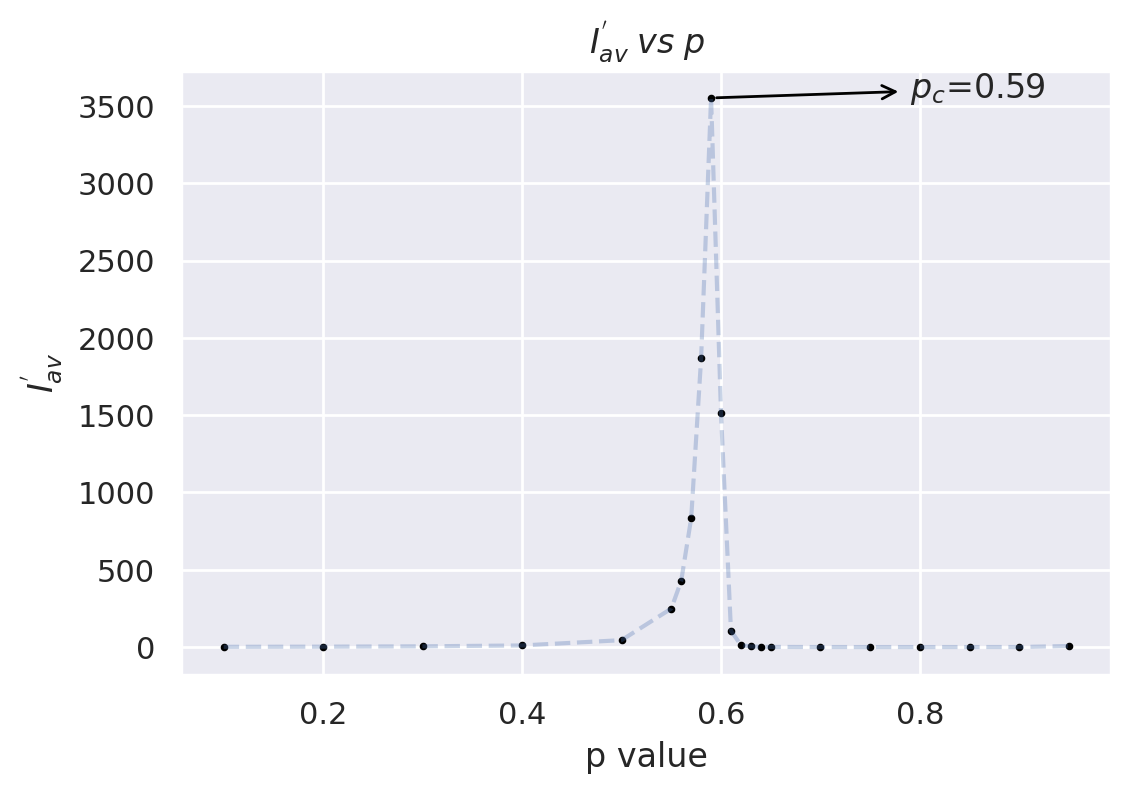

In [40]:
# Plot for I'

fig, ax = plt.subplots(dpi=200)
ax.scatter(p_vals, file[:, 1], s=3, color="black")
ax.plot(p_vals, file[:, 1], "--", alpha=.3)
ax.set_title("$I^{'}_{av} \; vs \; p$")
ax.set_xlabel("p value")
ax.set_ylabel("$I^{'}_{av}$")
arrowprops=dict(arrowstyle='<-', color='black', linewidth=1)

ax.annotate(f"$p_c$={p_c}",
            xy=(p_c, max(file[:, 1])),
            xytext=(p_c+.2, max(file[:, 1])),
            arrowprops=arrowprops
           )
plt.show() 


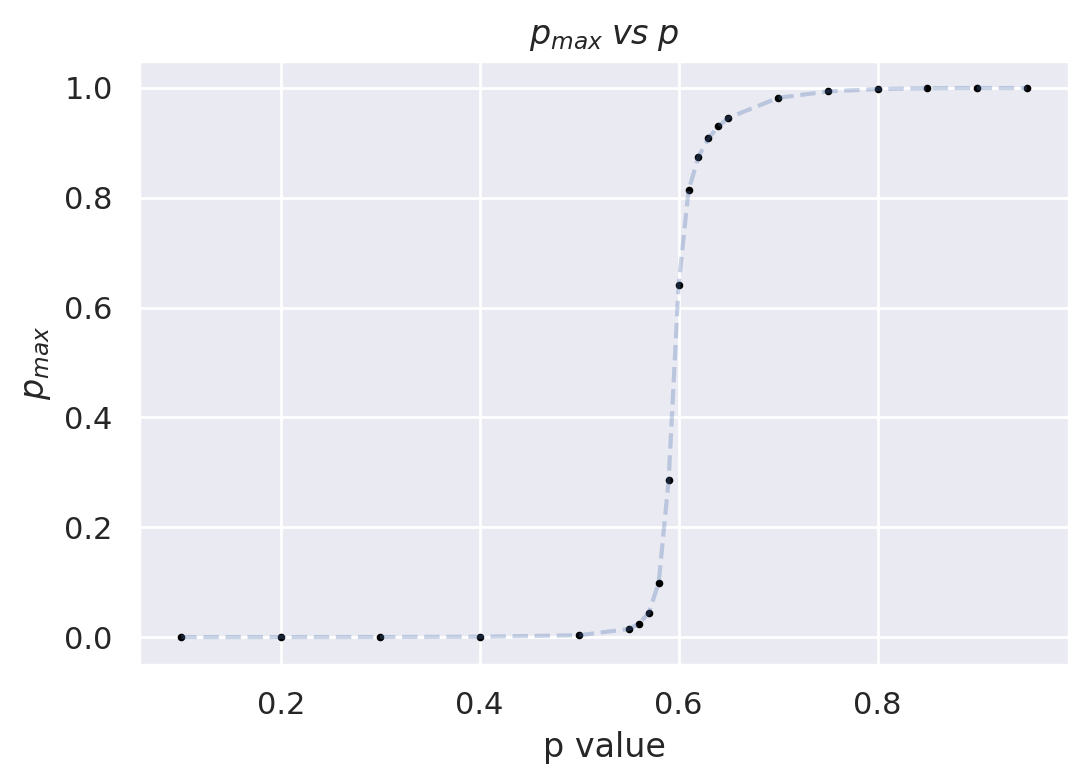

In [41]:
# Plot for pmax

fig, ax = plt.subplots(dpi=200)
ax.scatter(p_vals, file[:, 2], s=3, color="black")
ax.plot(p_vals, file[:, 2], "--", alpha=.3)
ax.set_title("$p_{max} \; vs \; p$")
ax.set_xlabel("p value")
ax.set_ylabel("$p_{max}$")
plt.show() 
